# Task 01 - Teoría

### 1. ¿Qué es el temporal difference learning y en qué se diferencia de los métodos tradicionales de aprendizaje supervisado? Explique el concepto de "error de diferencia temporal" y su papel en los algoritmos de aprendizaje por refuerzo

Temporal Difference Learning es una técnica de aprendizaje por refuerzo que permite a los agentes aprender iterativamente, sin necesidad de un modelo de entorno. Es decir, que no requiere un dataset de entradas y salidas correctas e incorrectas, lo que diferencia a este modelo de otros. 

En vez de calcular la recompensa total, calcula la recompensa inmediata (estimación) e inmediatamente después calcula la recompensa del siguiente estado *(Duong, 2021)*. Para corregir los errores, se apoya del valor de error diferencial temporal, que es la diferencia entre el valor estimado de un estado en un momento dado y el valor estimado después de observar el siguiente estado y recompensa. Con este valor, se actualizan las estimaciones de valor, lo que permite que el agente mejore su política de toma de decisiones a lo largo del proceso iterativo. 

*Duong, V. H. T. (2021, February 23). Intro to Reinforcement Learning: Temporal Difference Learning, Sarsa vs. Q-learning. Medium. https://towardsdatascience.com/intro-to-reinforcement-learning-temporal-difference-learning-sarsa-vs-q-learning-8b4184bb4978*

### 2. En el contexto de los juegos simultáneos, ¿cómo toman decisiones los jugadores sin conocer las acciones de sus oponentes? De un ejemplo de un escenario del mundo real que pueda modelarse como un juego simultáneo y discuta las estrategias que los jugadores podrían emplear en tal situación

En el contexto de juegos simultáneos, los jugadores toman decisiones sin conocer las decisiones del oponente, porque todos los jugadores toman decisiones al mismo tiempo. Juegos simultáneos asume que tenemos la información completa, es decir, que conocemos que podemos ganar o perder y sabemos la utilidad de las acciones que tomemos. Asume también que el oponente tiene la misma información. 

Existen varias estrategias para afrontar el tipo de problemas que presenta el contexto de juegos simultáneos:
- Estrategia dominante, en la que se elige la mejor acción posible independientemente de lo que elija el oponente
- Alcanzar un equilibrio de Nash, en donde ningún jugador puede mejorar su situación cambiando su estrategia porque uno de los jugadores mantiene la suya constante. 

Algunas otras que vale la pena mencionar son las siguientes:
- Estrategia pura, en la que el jugador puede identificar claramente cual es la mejor opción y la toma. 
- Estrategia mixta, en la que el jugador elige aleatoriamente entre varias acciones posibles, asignando una probabilidad específica a cada una de las opciones. 
- Uso de Minimax o Maximin, en el que se intenta minimizar la máxima perdida posible o maximizar la mínima ganancia posible. 
- Uso de la teoría de juegos evolutivos, en el que se asume que los jugadores adaptarán sus estrategias tomando en cuenta los mejores resultados pasados. 

Un ejemplo es el famoso dilema del prisionero. Consiste en un escenario en donde dos cómplices de un crimen son interrogados por separado. Si ambos eligen no delatar al otro, reciben una sentencia reducida. Si uno delata al otro mientras que el otro no lo delata, el delator no recibe sentencia mientras que el delatado recibe una sentencia máxima. Si ambos se delatan, ambos reciben sentencias grandes, pero no máximas. 
En este ejemplo, la estrategia dominante es delatar. Asumiendo que uno de los dos no lo haga, el que lo escoja saldrá libre. El equilibrio de Nash se alcanza cuando ambos se delatan. 

*Duong, V. H. T. (2021, February 23). Intro to Reinforcement Learning: Temporal Difference Learning, Sarsa vs. Q-learning. Medium. https://towardsdatascience.com/intro-to-reinforcement-learning-temporal-difference-learning-sarsa-vs-q-learning-8b4184bb4978*


### 3. ¿Qué distingue los juegos de suma cero de los juegos de suma cero y cómo afecta esta diferencia al proceso de toma de decisiones de los jugadores? Proporcione al menos un ejemplo de juegos que entren en la categoría de juegos de no suma cero y discuta las consideraciones estratégicas únicas involucradas

Los juegos de suma cero son aquellos en los que la ganancia de un jugador se traduce en la pérdida de otro jugador y viceversa. Por otro lado, los juegos de no suma cero son aquellos en los que los resultados no son necesariamente opuestos; los jugadores pueden ganar o perder en diferentes medidas. Esto afecta el proceso de toma de decisiones ya que los jugadores pueden buscar maximizar su propia ganancia sin necesariamente preocuparse por la pérdida de los demás. Un ejemplo de un juego de no suma cero es la negociación, donde las partes pueden alcanzar acuerdos que sean beneficiosos para ambas, en lugar de competir por un recurso finito.

Basado en: https://www.rankia.co/blog/analisis-colcap/4595268-que-juego-suma-cero-no


### 4. ¿Cómo se aplica el concepto de equilibrio de Nash a los juegos simultáneos? Explicar cómo el equilibrio de Nash representa una solución estable en la que ningún jugador tiene un incentivo para desviarse unilateralmente de la estrategia elegida

Como se dijo anteriormente, el equilibrio de Nash se alcanza cuando todos los jugadores tienen estrategias óptimas. Cuando ocurre esto, ninguno de los jugadores tiene incentivos para cambiar su estrategia. Este "estado" representa un equilibrio porque al actuar racionalmente, ninguno de los jugadores cambiará la estrategia y el juego se mantendrá igual.

### 5. Discuta la aplicación del temporal difference learning en el modelado y optimización de procesos de toma de decisiones en entornos dinámicos. ¿Cómo maneja el temporal difference learning el equilibrio entre exploración y explotación y cuáles son algunos de los desafíos asociados con su implementación en la práctica?


TD Learning se aplica en entornos dinámicos para modelar y optimizar procesos de toma de decisiones. Maneja el equilibrio entre exploración y explotación al actualizar las estimaciones de recompensa basadas en la experiencia pasada. Algunos desafíos asociados con su implementación incluyen la determinación de parámetros de aprendizaje adecuados, el manejo de la complejidad computacional en entornos de gran escala y la garantía de la convergencia a soluciones óptimas en entornos dinámicos y estocásticos.

Basado en: https://web.stanford.edu/group/pdplab/pdphandbook/handbookch10.html


# Task 02 - Connect Four

In [1]:
import numpy as np
import math
import random

In [2]:
# Constantes del juego

# Define el tamaño del tablero
CANT_FILAS = 6
CANT_COLUMNAS = 7

# Define el indice de los jugadores
JUGADOR = 0 
IA = 1

# Define las piezas de los jugadores
PIEZA_JUGADOR = 1
PIEZA_IA = 2

In [3]:
# Crea el tablero utilizando una matriz de 0s
def crearTablero():
    tablero = np.zeros((CANT_FILAS, CANT_COLUMNAS), dtype=int)
    return tablero

# Inserta la ficha en el tablero
def soltarFicha(tablero, fila, columna, pieza):
    tablero[fila][columna] = pieza

# Chequea si la columna es valida para soltar la ficha
def esValida(tablero, columna):
    return tablero[CANT_FILAS-1][columna] == 0

# Obtiene la siguiente fila vacia en la columna
def obtenerSiguienteFilaVacia(tablero, columna):
    for r in range(CANT_FILAS):
        if tablero[r][columna] == 0:
            return r

# Imprime el tablero
def imprimirTablero(tablero):
    tableroInvertido = np.flip(tablero, 0)
    filas, columnas = tableroInvertido.shape

    tableroInvertido = tableroInvertido.astype(int)

    for i in range(filas):
        print("|", end="")
        for j in range(columnas):
            print(f"{tableroInvertido[i,j]:2}", end=" |")
        print()
    
    print("-" * (columnas * 4))

    print("|", end=" ")
    for j in range(columnas):
        print(f"{j}", end=" | ")

# Chequea si alguien gano
def movimientoGanador(tablero, pieza):
    # Chequeo horizontal
    for i in range(CANT_COLUMNAS - 3):
        for j in range(CANT_FILAS):
            if tablero[j][i] == pieza and tablero[j][i+1] == pieza and tablero[j][i+2] == pieza and tablero[j][i+3] == pieza:
                return True
    
    # Chequeo vertical
    for i in range(CANT_COLUMNAS):
        for j in range(CANT_FILAS - 3):
            if tablero[j][i] == pieza and tablero[j+1][i] == pieza and tablero[j+2][i] == pieza and tablero[j+3][i] == pieza:
                return True
    
    # Chequeo diagonal positiva
    for i in range(CANT_COLUMNAS - 3):
        for j in range(CANT_FILAS - 3):
            if tablero[j][i] == pieza and tablero[j+1][i+1] == pieza and tablero[j+2][i+2] == pieza and tablero[j+3][i+3] == pieza:
                return True
    
    # Chequeo diagonal negativa
    for i in range(CANT_COLUMNAS - 3):
        for j in range(3, CANT_FILAS):
            if tablero[j][i] == pieza and tablero[j-1][i+1] == pieza and tablero[j-2][i+2] == pieza and tablero[j-3][i+3] == pieza:
                return True

    return False

# Obtiene una lista con las posiciones validas para soltar la ficha
def obtenerPosicionesValidas(tablero):
    posicionesValidas = []
    for i in range(CANT_COLUMNAS):
        if esValida(tablero, i):
            posicionesValidas.append(i)
    return posicionesValidas


In [4]:
class AGENTE_IA:
    def __init__(self, alfa_beta_poda):
        self.alfa_beta_poda = alfa_beta_poda
    
    def puntajePosicion(self, tablero, pieza):
        puntaje = 0
        piezaOponente = PIEZA_JUGADOR

        tableroDeEvaluacion = np.array([[3, 4, 5, 7, 5, 4, 3],
                                        [4, 6, 8, 10, 8, 6, 4],
                                        [5, 8, 11, 13, 11, 8, 5],
                                        [5, 8, 11, 13, 11, 8, 5],
                                        [4, 6, 8, 10, 8, 6, 4],
                                        [3, 4, 5, 7, 5, 4, 3]])
        
        puntajePieza = np.sum(tableroDeEvaluacion[tablero == pieza])
        puntajeOponente = np.sum(tableroDeEvaluacion[tablero == piezaOponente])
        
        puntaje = puntajePieza - puntajeOponente
        return puntaje

    def isTerminalNode(self, tablero):
        return movimientoGanador(tablero, PIEZA_JUGADOR) or movimientoGanador(tablero, PIEZA_IA) or len(obtenerPosicionesValidas(tablero)) == 0

    def minimax(self, tablero, maximizandoJugador, profundidad, alfa = None, beta = None):
        lugaresValidos = obtenerPosicionesValidas(tablero)
        esTerminal = self.isTerminalNode(tablero)
        
        if profundidad == 0 or esTerminal:
            if esTerminal:
                if movimientoGanador(tablero, PIEZA_IA):
                    return (None, math.inf)
                elif movimientoGanador(tablero, PIEZA_JUGADOR):
                    return (None, -math.inf)
                else:
                    return (None, 0)
            else:
                return (None, self.puntajePosicion(tablero, PIEZA_IA))
            
        if maximizandoJugador:
            valor = -math.inf
            columna = random.choice(lugaresValidos)
            for col in lugaresValidos:
                fila = obtenerSiguienteFilaVacia(tablero, col)
                tableroTemporal = tablero.copy()
                soltarFicha(tableroTemporal, fila, col, PIEZA_IA)
                nuevoValor = self.minimax(tableroTemporal, False, profundidad - 1, alfa, beta)[1]
                
                if nuevoValor > valor:
                    valor = nuevoValor
                    columna = col
                if self.alfa_beta_poda:  # Solo actualiza alfa y beta si alfa_beta_poda es True
                    alfa = max(alfa, valor)
                    if alfa >= beta:
                        break
            return columna, valor
        
        else:
            value = math.inf
            columna = random.choice(lugaresValidos)
            for col in lugaresValidos:
                fila = obtenerSiguienteFilaVacia(tablero, col)
                tableroTemporal = tablero.copy()
                soltarFicha(tableroTemporal, fila, col, PIEZA_JUGADOR)
                nuevoValor = self.minimax(tableroTemporal, True, profundidad - 1, alfa, beta)[1]
                
                if nuevoValor < value:
                    value = nuevoValor
                    columna = col
                if self.alfa_beta_poda:  # Solo actualiza alfa y beta si alfa_beta_poda es True
                    beta = min(beta, value)
                    if alfa >= beta:
                        break
            return columna, value

# Agente QLearning

In [5]:
import pickle

class Agente_IA_QL:
    def __init__(self, alpha = 0.95, gamma = 0.9, epsilon = 0.95, pieza = 2, q_table_file = 'q_table.pkl'):
        self.pieza = pieza
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table_file = q_table_file
        try:
            with open(self.q_table_file, 'rb') as f:
                self.Q = pickle.load(f)
        except FileNotFoundError:
            self.Q = {}
        
    def getQ(self, estado, accion):
        estado_inmutable = tuple(tuple(x) for x in estado)
        return self.Q.get((estado_inmutable, accion), 0.0)
    
    def seleccionarAccion(self, estado, accionesPosibles):
        if np.random.random() < self.epsilon:
            return random.choice(accionesPosibles)
        else:
            Qs = [self.getQ(estado, a) for a in accionesPosibles]
            return accionesPosibles[np.argmax(Qs)]
    
    def updateQ(self, estado, accion, recompensa, nuevoEstado, nuevaAccion):
        estado_inmutable = tuple(tuple(x) for x in estado)
        nuevoEstado_inmutable = tuple(tuple(x) for x in nuevoEstado)
        self.Q[(estado_inmutable, accion)] = self.getQ(estado, accion) + self.alpha * (recompensa + self.gamma * max([self.getQ(nuevoEstado_inmutable, a) for a in nuevaAccion]) - self.getQ(estado, accion))
 
    def jugar(self, estado):
        accionesPosibles = obtenerPosicionesValidas(estado)
        accion = self.seleccionarAccion(estado, accionesPosibles)
        siguienteEstado = np.copy(estado)
        soltarFicha(siguienteEstado, obtenerSiguienteFilaVacia(siguienteEstado, accion), accion, self.pieza)
        recompensa = 1 if movimientoGanador(siguienteEstado, 1) else -1 if len(obtenerPosicionesValidas(siguienteEstado)) == 0 else 0
        siguienteAccion = obtenerPosicionesValidas(siguienteEstado)
        self.updateQ(estado, accion, recompensa, siguienteEstado, siguienteAccion)
        return siguienteEstado

    def guardarQ(self):
        with open(self.q_table_file, 'wb') as f:
            pickle.dump(self.Q, f)

# Humanos vs IA-QL

In [6]:
# creamos el tablero
tablero = crearTablero()

# Inicializamos las variables del juego
juegoTerminado = False
turno = random.randint(JUGADOR, IA)
jugadorHumano = True

agente01 = Agente_IA_QL(pieza=PIEZA_JUGADOR)
agente02 = Agente_IA_QL(pieza=PIEZA_IA)

# Imprimimos el tablero
imprimirTablero(tablero)
print("\n")

while not juegoTerminado:
    if turno == JUGADOR:
        # Turno del jugador
        if jugadorHumano:
            print("---> Turno del Jugador <---")
            columna = int(input("Elije una columna (0-6): "))
            
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                if movimientoGanador(tablero, PIEZA_JUGADOR):
                    print("Ganaste!")
                    juegoTerminado = True
                    imprimirTablero(tablero)
                    break
            
            imprimirTablero(tablero)
            print("\n") 
            turno += 1
            turno = turno % 2

        else:
            print("---> Turno de la IA-01 <---")
            tablero = agente01.jugar(tablero)
            if movimientoGanador(tablero, PIEZA_JUGADOR):
                print("Ganó la IA - 01!")
                juegoTerminado = True
                imprimirTablero(tablero)
                break
                
            imprimirTablero(tablero)
            print("\n")
            turno += 1
            turno = turno % 2
                
    else:
        # Turno de la IA
        print("---> Turno de la IA <---")
        tablero = agente02.jugar(tablero)
        if movimientoGanador(tablero, PIEZA_IA):
            print("Ganó la IA - 02!")
            juegoTerminado = True
            imprimirTablero(tablero)
            break
            
        imprimirTablero(tablero)
        print("\n")
        turno += 1
        turno = turno % 2
            
    
    if len(obtenerPosicionesValidas(tablero)) == 0:
        print("Empate!")
        print("\n")
        imprimirTablero(tablero)
        juegoTerminado = True

| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno del Jugador <---


KeyboardInterrupt: Interrupted by user

# Entrenamiento

In [7]:

juegosGanados = [0, 0]
# Utilizamos los valores por defecto de alpha, gamma y epsilon, estos son para entrenar el agente
agente01 = Agente_IA_QL(pieza=PIEZA_JUGADOR)

for i in range(30000):
    print(f"Juego {i}")
    # creamos el tablero
    tablero = crearTablero()

    # Inicializamos las variables del juego
    juegoTerminado = False
    turno = random.randint(JUGADOR, IA)

    podaAlfaBetaIA02 = True
    profundidadIA2 = 3
    agente02 = AGENTE_IA(podaAlfaBetaIA02)

    while not juegoTerminado:
        if turno == JUGADOR:
            # Turno del jugador
            tablero = agente01.jugar(tablero)
            if movimientoGanador(tablero, PIEZA_JUGADOR):
                print("Ganó la IA - 01!")
                juegosGanados[0] = juegosGanados[0] + 1
                juegoTerminado = True
                break
                
            turno += 1
            turno = turno % 2   
                    
        else:
            columna, puntaje = agente02.minimax(tablero, True, profundidadIA2, -math.inf, math.inf)
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_IA)
                if movimientoGanador(tablero, PIEZA_IA):
                    print("Ganó la IA - 02!")
                    juegosGanados[1] = juegosGanados[1] + 1
                    juegoTerminado = True
                    break
                
            turno += 1
            turno = turno % 2
                
        
        if len(obtenerPosicionesValidas(tablero)) == 0:
            print("Empate!")
            juegoTerminado = True

agente01.guardarQ()
print(juegosGanados)

Juego 0
Ganó la IA - 02!
Juego 1
Ganó la IA - 02!
Juego 2
Ganó la IA - 02!
Juego 3
Ganó la IA - 02!
Juego 4
Ganó la IA - 02!
Juego 5
Ganó la IA - 02!
Juego 6
Ganó la IA - 02!
Juego 7
Ganó la IA - 02!
Juego 8
Ganó la IA - 02!
Juego 9
Ganó la IA - 02!
Juego 10
Ganó la IA - 02!
Juego 11
Ganó la IA - 02!
Juego 12
Ganó la IA - 02!

KeyboardInterrupt: 

# IA-QL vs Minimax

In [8]:

juegosGanados = [0, 0]

# valores para jugar con la IA-01
alpha = 0.01
gamma = 0.9
epsilon = 0.01
agente01 = Agente_IA_QL(pieza=PIEZA_JUGADOR, alpha=alpha, gamma=gamma, epsilon=epsilon)

podaAlfaBetaIA02 = False
profundidadIA2 = 2
agente02 = AGENTE_IA(podaAlfaBetaIA02)

for i in range(75):
    # creamos el tablero
    tablero = crearTablero()

    # Inicializamos las variables del juego
    juegoTerminado = False
    turno = random.randint(JUGADOR, IA)

    while not juegoTerminado:
        if turno == JUGADOR:
            tablero = agente01.jugar(tablero)
            if movimientoGanador(tablero, PIEZA_JUGADOR):
                juegosGanados[0] = juegosGanados[0] + 1
                juegoTerminado = True
                break
                
            turno += 1
            turno = turno % 2
                    
        else:
            columna, puntaje = agente02.minimax(tablero, True, profundidadIA2, -math.inf, math.inf)
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_IA)
                if movimientoGanador(tablero, PIEZA_IA):
                    juegosGanados[1] = juegosGanados[1] + 1
                    juegoTerminado = True
                    break
                
            turno += 1
            turno = turno % 2
                
        
        if len(obtenerPosicionesValidas(tablero)) == 0:
            juegoTerminado = True

agente01.guardarQ()
print(juegosGanados)

[0, 74]


# Gráfica de resultados

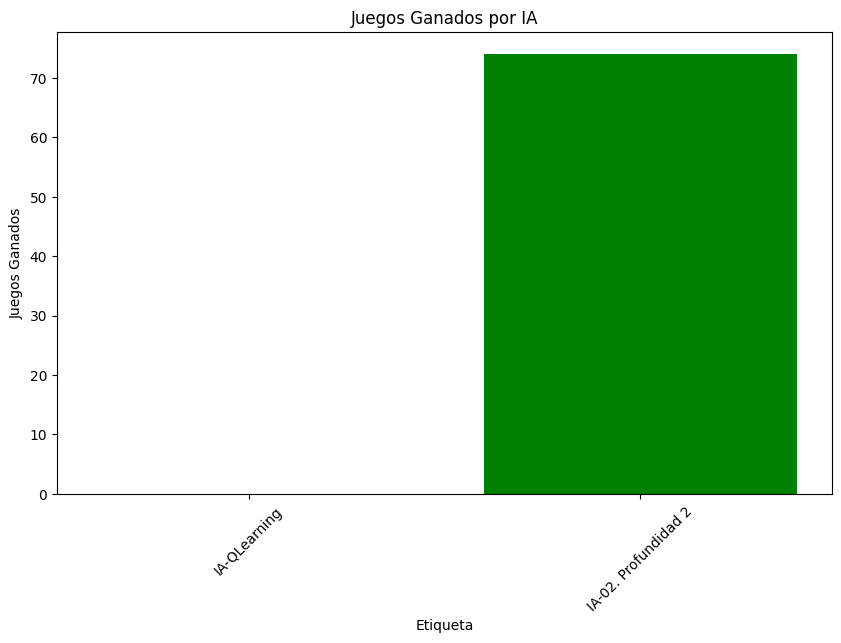

In [9]:
import matplotlib.pyplot as plt

etiquetas = [f'IA-QLearning', f'IA-02. Profundidad {profundidadIA2}']

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Tamaño opcional
plt.bar(etiquetas, juegosGanados, color=['blue', 'green'])  # Crear gráfico de barras con colores

plt.xlabel('Etiqueta')  # Etiqueta del eje X
plt.ylabel('Juegos Ganados')  # Etiqueta del eje Y
plt.title('Juegos Ganados por IA')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor lectura

# Guardar la gráfica en un archivo
plt.savefig('juegos_ganados_por_ia.png', bbox_inches='tight')  # Guardar la imagen, ajustar el layout

# Mostrar la gráfica
plt.show()

# IA-Qlearning vs Minimax con Poda

In [10]:

juegosGanados = [0, 0]

# valores para jugar con la IA-01
alpha = 0.01
gamma = 0.9
epsilon = 0.01
agente01 = Agente_IA_QL(pieza=PIEZA_JUGADOR, alpha=alpha, gamma=gamma, epsilon=epsilon)

podaAlfaBetaIA02 = True
profundidadIA2 = 4
agente02 = AGENTE_IA(podaAlfaBetaIA02)

for i in range(75):
    # creamos el tablero
    tablero = crearTablero()

    # Inicializamos las variables del juego
    juegoTerminado = False
    turno = random.randint(JUGADOR, IA)

    while not juegoTerminado:
        if turno == JUGADOR:
            tablero = agente01.jugar(tablero)
            if movimientoGanador(tablero, PIEZA_JUGADOR):
                juegosGanados[0] = juegosGanados[0] + 1
                juegoTerminado = True
                break
                
            turno += 1
            turno = turno % 2
                    
        else:
            columna, puntaje = agente02.minimax(tablero, True, profundidadIA2, -math.inf, math.inf)
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_IA)
                if movimientoGanador(tablero, PIEZA_IA):
                    juegosGanados[1] = juegosGanados[1] + 1
                    juegoTerminado = True
                    break
                
            turno += 1
            turno = turno % 2
                
        
        if len(obtenerPosicionesValidas(tablero)) == 0:
            juegoTerminado = True

agente01.guardarQ()
print(juegosGanados)

[0, 75]


# Gráfica de resultados

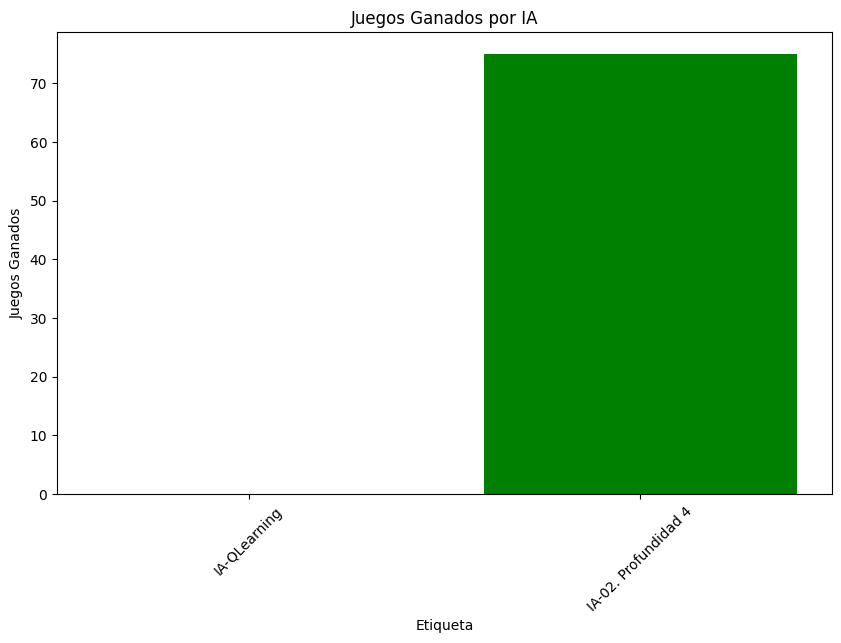

In [11]:
import matplotlib.pyplot as plt

etiquetas = [f'IA-QLearning', f'IA-02. Profundidad {profundidadIA2}']

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Tamaño opcional
plt.bar(etiquetas, juegosGanados, color=['blue', 'green'])  # Crear gráfico de barras con colores

plt.xlabel('Etiqueta')  # Etiqueta del eje X
plt.ylabel('Juegos Ganados')  # Etiqueta del eje Y
plt.title('Juegos Ganados por IA')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor lectura

# Guardar la gráfica en un archivo
plt.savefig('juegos_ganados_por_ia.png', bbox_inches='tight')  # Guardar la imagen, ajustar el layout

# Mostrar la gráfica
plt.show()

# Referencias
### Codigo para la evaluacion de ganadores
https://www.youtube.com/watch?v=rbmk1qtVEmg
### Obtencion de la matriz de valores inicial
Chat Copilot - prompt:

        evaluation_board = np.array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
        Como asi?

Respuesta:

En el juego de Connect 4 (Conecta 4), las posiciones centrales suelen ser más valiosas porque ofrecen más oportunidades para conectar cuatro fichas. Por lo tanto, podríamos asignar valores más altos a las posiciones centrales y valores más bajos a las posiciones de los bordes. Aquí hay un ejemplo de cómo podrías hacerlo:

En este tablero de evaluación, las posiciones con valores más altos son más deseables para el jugador. Por supuesto, estos valores son solo sugerencias y podrías ajustarlos según tu estrategia de juego.

    evaluation_board = np.array([[3, 4, 5, 7, 5, 4, 3],
                             [4, 6, 8, 10, 8, 6, 4],
                             [5, 8, 11, 13, 11, 8, 5],
                             [5, 8, 11, 13, 11, 8, 5],
                             [4, 6, 8, 10, 8, 6, 4],
                             [3, 4, 5, 7, 5, 4, 3]])

# Link del video
--> https://youtu.be/5N4BZGV4z4w
# Link del Repo
https://github.com/angelcast2002/Lab07-IA.git